In [89]:
import dataset
import numpy as np
import pandas as pd
import random
from math import exp
from math import log
import matplotlib.pyplot as plt

In [90]:
dataset = dataset.Dataset()
user_train,user_validation,user_test, usernum, itemnum = dataset.fetch_shaping_dataset()

Fixed item_id...
	num_users = 671
	num_items = 9066
	df_shape  = (100004, 4)
	num_users = 671
	num_items = 9066
	df_shape  = (100004, 4)
Normalizing temporal values...
Normalizing temporal values...


In [91]:
itemnum

9066

In [92]:
user_train

{383: [20,
  45,
  870,
  644,
  561,
  617,
  31,
  87,
  122,
  0,
  24,
  58,
  661,
  503,
  34,
  28,
  575,
  1100,
  658,
  675,
  615,
  625,
  866,
  13,
  556,
  650,
  941,
  648,
  535,
  638,
  1101,
  441,
  849,
  63,
  550,
  49,
  847,
  77,
  895,
  3496,
  654,
  340,
  92,
  679,
  8,
  559,
  5,
  596,
  598,
  1152,
  100,
  321,
  406,
  129,
  344,
  871,
  232,
  266,
  258,
  174,
  955,
  32],
 409: [20,
  24,
  29,
  31,
  33,
  79,
  15,
  0,
  367,
  129,
  524,
  180,
  277,
  284,
  285,
  296,
  313,
  344,
  275,
  276,
  100,
  48,
  133,
  380,
  196,
  144,
  207,
  203,
  132,
  523,
  576,
  274,
  266,
  262,
  45,
  260,
  252,
  244,
  240,
  237,
  236,
  204,
  14,
  383,
  32,
  171,
  187,
  314,
  44,
  21,
  425],
 224: [87,
  24,
  441,
  535,
  559,
  95,
  0,
  92,
  20,
  49,
  15,
  16,
  31,
  33,
  41,
  5,
  54,
  79,
  1,
  27,
  141,
  137,
  128,
  32,
  100,
  132,
  133,
  129,
  361,
  196,
  313,
  377,
  384,
  521,
  309,

In [93]:
items = list(user_train.values())

In [94]:
max(items)

[5523,
 893,
 2629,
 1695,
 1246,
 2538,
 2058,
 2437,
 533,
 2348,
 148,
 3031,
 2199,
 6460,
 4560,
 960,
 3854,
 2288,
 1843,
 6892,
 2374,
 6842,
 6476,
 6871,
 5116]

In [95]:
for user in user_train:
    print(user)

383
409
224
511
536
389
464
437
538
619
555
47
639
447
39
357
122
487
121
126
184
641
496
649
659
319
32
396
568
421
440
2
593
82
589
385
449
144
85
161
279
114
535
666
662
249
191
110
400
266
188
629
416
399
338
657
556
588
127
602
64
551
172
108
552
192
302
513
508
516
80
650
113
135
254
145
375
225
182
288
354
495
517
36
667
151
241
50
369
317
194
86
633
92
590
168
415
24
344
403
413
154
484
490
256
7
112
162
21
284
514
70
100
308
233
67
19
636
55
18
223
548
87
44
459
25
215
616
640
502
507
318
361
506
543
329
390
603
252
173
90
530
537
343
642
269
559
434
435
391
420
311
631
492
206
504
280
177
57
119
227
408
99
545
9
363
670
28
594
373
472
467
27
509
427
608
321
306
497
597
491
436
658
550
74
10
155
510
466
617
644
411
141
30
489
651
65
342
518
180
137
388
573
214
647
305
653
330
482
380
4
259
118
171
539
395
247
646
167
565
493
232
53
258
12
246
102
242
358
372
196
312
529
265
348
222
58
368
407
569
595
285
499
533
129
558
326
367
360
189
220
193
476
534
34
160
376
219
66
585
71


In [96]:
item_successor = [[] for it in range(itemnum)]

In [97]:
for user in user_train:
    for i in range(len(user_train[user])-1):
        pre = user_train[user][i]
        suc = user_train[user][i+1]
        item_successor[pre].append(suc)

In [98]:
num_relation = sum([len(item_successor[item]) for item in range(itemnum)])

In [99]:
num_relation

69521

In [100]:
user_train[671]

[2147,
 1866,
 962,
 1001,
 2241,
 871,
 1813,
 1839,
 1573,
 3223,
 1330,
 3228,
 4255,
 4391,
 2727,
 1624,
 1486,
 2541,
 2239,
 3113,
 381,
 2288,
 2407,
 2004,
 1019,
 494,
 321,
 1906,
 1869,
 2609,
 2458,
 1305,
 2453,
 322,
 4413,
 3854,
 3869,
 3803,
 3233,
 4367,
 3199,
 3419,
 4098,
 2780,
 3213,
 202,
 284,
 266,
 2374,
 2248,
 1013,
 535,
 4412,
 953,
 1352,
 48,
 916,
 955,
 912,
 2212,
 2062,
 2506,
 0,
 1045,
 979,
 232,
 881,
 2531,
 474,
 3871,
 4147,
 954,
 1590,
 1744,
 994,
 840,
 522,
 4135,
 1281,
 1125,
 1332,
 3845,
 4081,
 3000,
 3232,
 3220,
 4321,
 3800,
 3420,
 3999,
 3810,
 4051,
 622,
 2340,
 981,
 406,
 4546,
 2925,
 1020,
 1911,
 523,
 34,
 4507,
 740,
 976,
 521,
 839,
 4545,
 3882,
 4417,
 2627,
 4597,
 4610,
 4696,
 2700]

In [45]:
def sigmoid(x):
    return 1.0 / (1 + exp(-x))

In [26]:
def TransPredict(user, pre, cur):
    return - beta[cur] - np.sum(np.square(H[pre,:] + r + R[user,:] - H[cur,:]))

In [79]:
def findUser():
    user_list = list(user_train.keys())
    while 1:
        user = random.choice(user_list)
        if len(user_train[user]) > 1:
            return user

In [80]:
user_list = list(user_train.keys())
for user in user_list:
    print(user)

383
409
224
511
536
389
464
437
538
619
555
47
639
447
39
357
122
487
121
126
184
641
496
649
659
319
32
396
568
421
440
2
593
82
589
385
449
144
85
161
279
114
535
666
662
249
191
110
400
266
188
629
416
399
338
657
556
588
127
602
64
551
172
108
552
192
302
513
508
516
80
650
113
135
254
145
375
225
182
288
354
495
517
36
667
151
241
50
369
317
194
86
633
92
590
168
415
24
344
403
413
154
484
490
256
7
112
162
21
284
514
70
100
308
233
67
19
636
55
18
223
548
87
44
459
25
215
616
640
502
507
318
361
506
543
329
390
603
252
173
90
530
537
343
642
269
559
434
435
391
420
311
631
492
206
504
280
177
57
119
227
408
99
545
9
363
670
28
594
373
472
467
27
509
427
608
321
306
497
597
491
436
658
550
74
10
155
510
466
617
644
411
141
30
489
651
65
342
518
180
137
388
573
214
647
305
653
330
482
380
4
259
118
171
539
395
247
646
167
565
493
232
53
258
12
246
102
242
358
372
196
312
529
265
348
222
58
368
407
569
595
285
499
533
129
558
326
367
360
189
220
193
476
534
34
160
376
219
66
585
71


In [107]:
def findNegSucc(pos_item):
    while 1:
        neg_item = random.randint(0,itemnum-1)
        if neg_item != pos_item:
            return neg_item

In [111]:
def AUC():
    auc_train = 0
    auc_valid = 0
    auc_test = 0
    testnum = 0     # event num per user in AUC testing
    # max_itemid = max(item_train.keys())
    for user in user_test:
        if user not in  user_train or len(user_train[user])<2 or len(user_test[user])==0:
            continue
        testnum += 1

        train_pre_item = user_train[user][-2]
        train_item = user_train[user][-1]
        train_score = TransPredict(user, train_pre_item, train_item)          
        
        valid_pre_item = user_validation[user][0]
        valid_item = user_validation[user][1]
        valid_score = TransPredict(user, valid_pre_item, valid_item)
        
        test_pre_item = user_test[user][0]
        test_item = user_test[user][1]
        test_score = TransPredict(user, test_pre_item, test_item)
        
        
        count_train, count_valid, count_test = 0, 0, 0
        neg_num = 0
        for ind in range(100):
            itemid = random.randint(0,itemnum-1)
            if itemid not in user_train[user] and itemid not in user_test[user]:
                neg_num += 1
                
                neg_score = TransPredict(user, train_pre_item, itemid)
                if neg_score < train_score:
                    count_train += 1
                elif neg_score == valid_score:
                    count_train += 0.5
                else:
                    count_train += 0                
                
                neg_score = TransPredict(user, valid_pre_item, itemid)
                if neg_score < valid_score:
                    count_valid += 1
                elif neg_score == valid_score:
                    count_valid += 0.5
                else:
                    count_valid += 0
                
                neg_score = TransPredict(user, test_pre_item, itemid)
                if neg_score < test_score:
                    count_test += 1
                elif neg_score == test_score:
                    count_test += 0.5
                else:
                    count_test += 0
        
        auc_train += count_train*1.0 / neg_num
        auc_valid += count_valid*1.0 / neg_num
        auc_test += count_test*1.0 / neg_num
    
    auc_train = auc_train/testnum
    auc_valid = auc_valid/testnum
    auc_test = auc_test/testnum
    print("training AUC: ", auc_train)
    print("validation AUC: ", auc_valid)
    print("testing AUC: ", auc_test)
    return auc_train, auc_valid, auc_test

In [112]:
def normalization(it):
    dist = np.sqrt(np.sum(np.square(H[it,:])))
    if dist > 1:
        H[it,:] = H[it,:] / dist

In [113]:
usernum

671

In [114]:
lam = 0.05
bias_lam = 0.01
reg_lam = 0.1
K = 10
learn_rate = 0.05
max_iter = 500
r = np.zeros(K)
R = np.random.rand(usernum, K)/1 - 0.5
H = np.random.rand(itemnum, K)/1 - 0.5
beta = np.zeros(itemnum)

auc_rec_train = []
auc_rec_valid = []
auc_rec_test = []

iteration: 5	-14716.647573683242	-14363.904731642366
iteration: 10	-13747.851439626182	-13401.972910728018
training AUC:  0.6496301507009742
validation AUC:  0.6302655262303585
testing AUC:  0.3391152691780778
iteration: 15	-13242.970727995878	-12899.140869982044
iteration: 20	-12837.452899757507	-12493.182024772745
training AUC:  0.7115311171746417
validation AUC:  0.621284331599042
testing AUC:  0.33093539619599555
iteration: 25	-12520.714472846046	-12176.107373319712
iteration: 30	-12317.914389193058	-11971.548303846634
training AUC:  0.8096012175797123
validation AUC:  0.6418824556566493
testing AUC:  0.3662255223868127
iteration: 35	-12280.006896658882	-11931.927928944864
iteration: 40	-11940.362887250429	-11591.26780774139
training AUC:  0.7981767914444887
validation AUC:  0.6520482575692983
testing AUC:  0.35998101409013195
iteration: 45	-12039.754677841116	-11688.941660623545
iteration: 50	-11848.770001957591	-11496.838084505318
training AUC:  0.812607020713673
validation AUC: 

iteration: 395	-10884.649743380867	-10503.691160859891
iteration: 400	-10933.385178496388	-10552.689135973045
training AUC:  0.7881812118654223
validation AUC:  0.6634926490565587
testing AUC:  0.38225790195715004
iteration: 405	-10998.682857456663	-10617.76150488876
iteration: 410	-10794.54297942364	-10413.813091355314
training AUC:  0.8485773693241635
validation AUC:  0.5384936430875581
testing AUC:  0.45802380476506704
iteration: 415	-10807.437585293708	-10426.689449851026
iteration: 420	-10932.60996132659	-10551.77781881355
training AUC:  0.84803766626748
validation AUC:  0.5609723247766727
testing AUC:  0.4226230291447683
iteration: 425	-10733.897770746313	-10352.73673850848
iteration: 430	-10710.188018028104	-10328.728617730536
training AUC:  0.8125449223822884
validation AUC:  0.6527370315590882
testing AUC:  0.32493287191975584
iteration: 435	-10926.409034752318	-10544.94028176675
iteration: 440	-10748.422150217028	-10366.963488803654
training AUC:  0.8008987556069871
validatio

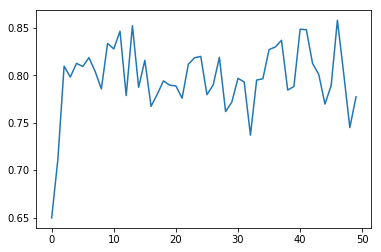

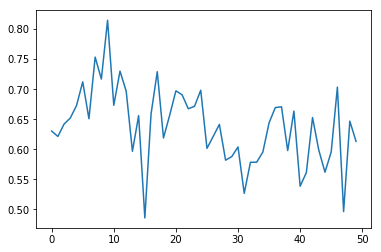

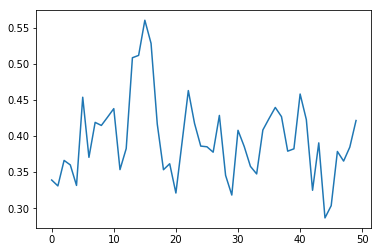

In [115]:
for it in range(max_iter):
    objective = 0
    regularization = 0
#    dg = np.zeros((itemnum, K))
#    de = np.zeros((K, itemnum))
    
    for ind in range(num_relation):
        u = findUser()
        position = random.randint(0,len(user_train[u])-2)
        p = user_train[u][position]        # previous item
        i = user_train[u][position + 1]    # positive item
        j = findNegSucc(i)                 # negative item
        
        d1 = H[p,:] + r + R[u-1,:] - H[i,:]
        d2 = H[p,:] + r + R[u-1,:] - H[j,:]
        
        z = sigmoid(-beta[i] + beta[j] - np.sum(np.square(d1)) + np.sum(np.square(d2)))
#        dg[u,:] += (1-z)*(eta[:,i]-eta[:,j])
#        de[:,i] += (1-z)*(gam[u,:])
#        de[:,j] += (1-z)*(-gam[u,:])
        beta[i] += learn_rate*(-(1-z) - 2*bias_lam*beta[i])
        beta[j] += learn_rate*((1-z) - 2*bias_lam*beta[j])
        H[p,:] += learn_rate*((1-z)*2*(d2-d1) - 2*lam*H[p,:])
        H[i,:] += learn_rate*((1-z)*2*(d1) - 2*lam*H[i,:])
        H[j,:] += learn_rate*((1-z)*2*(-d2) - 2*lam*H[j,:])
        r += learn_rate*((1-z)*2*(d2-d1) - 2*lam*r)
        R[u-1] = learn_rate*((1-z)*2*(d2-d1) - 2*reg_lam*R[u-1])
        
        normalization(p)
        normalization(i)
        normalization(j)
        
        objective += log(z)
    
#    dg -= lam*gam
#    de -= lam*eta
#    gam += learn_rate*dg
#    eta += learn_rate*de 
    
    regularization = objective - lam*np.sum(np.square(H)) - \
                                 lam*np.sum(np.square(r)) - \
                                 reg_lam*np.sum(np.square(R)) - \
                                 bias_lam*np.sum(np.square(beta))
                                                 
    if (it+1)%5 == 0:
        print('iteration: ' + str(it+1) + '\t' + str(regularization) \
                                 + '\t' + str(objective))
    if (it+1)%10 == 0:
        auc = AUC()
        auc_rec_train.append(auc[0])
        auc_rec_valid.append(auc[1])
        auc_rec_test.append(auc[2])

plt.figure()
plt.plot(auc_rec_train)
plt.figure()
plt.plot(auc_rec_valid)
plt.figure()
plt.plot(auc_rec_test)

np.save("itemVector.npy",H)
np.save("userVector.npy",R)


## PCA で次元圧縮する

###  3次元

In [10]:
from time import time
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)

In [11]:
userVector = \
np.load(
    file="userVector.npy", 
)

In [12]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(userVector)

In [14]:
user_vec_num =  x_pca.shape[0]

In [21]:
user_vec_num

671

In [15]:
X = []
Y = []

for user in range(0, user_vec_num):
    X.append(x_pca[user][0])
    Y.append(x_pca[user][1])

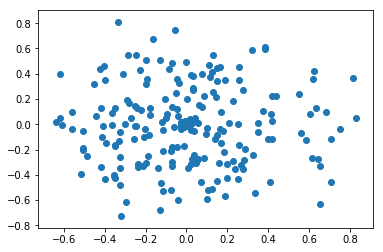

In [16]:
# X, Y の散布図をプロット
plt.scatter(X, Y) 
plt.show()

### ３次元

In [17]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
#3次元プロットするためのモジュール
from mpl_toolkits.mplot3d import Axes3D

In [18]:
pca = PCA(n_components=3)
x_pca_3 = pca.fit_transform(userVector)

In [19]:
d1 = []
d2 = []
d3 = []

for user in range(0, user_vec_num):
    d1.append(x_pca_3[user][0])
    d2.append(x_pca_3[user][1])
    d3.append(x_pca_3[user][2])

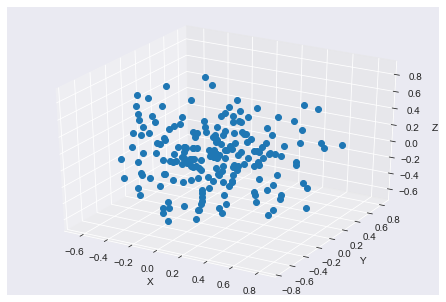

In [20]:
fig = plt.figure()
ax = Axes3D(fig)

#軸にラベルを付ける
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

#.plotで描画
ax.plot(d1,d2,d3,marker="o",linestyle='None')

#最後に.show()を書いてグラフ表示
plt.show()